In [231]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
# is an open-source Python library for machine learning.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [232]:
df=pd.read_csv('Egypt_Houses_Price.csv')

In [233]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [235]:
df.shape

(27361, 12)

In [236]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [237]:
df.nunique()

Type                11
Price             4182
Bedrooms            22
Bathrooms           22
Area              1073
Furnished            3
Level               14
Compound           560
Payment_Option       4
Delivery_Date       10
Delivery_Term        5
City               183
dtype: int64

In [238]:
for i in range(12):
   print(i, df.iloc[:,i].unique() )
   print()

0 ['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Unknown' 'Chalet'
 'Standalone Villa' 'Twin house' 'Town House' 'Stand Alone Villa'
 'Twin House']

1 ['4000000' '2250000' '1900000' ... '6276000' '11950000' '12284000']

2 ['3.0' '2.0' '4.0' '5.0' '1.0' 'Unknown' '7.0' '6.0' '10+' '3' '2' '5' '4'
 '1' '6' '7' nan '8' '10' '9' '9.0' '8.0' '10.0']

3 ['3.0' '2.0' '5.0' '1.0' '4.0' 'Unknown' '7.0' '10+' '3' '2' '1' '4' '6'
 '5' '7' nan '8' '6.0' '10.0' '9' '10' '8.0' '9.0']

4 ['400.0' '160.0' '165.0' ... '933.0' '631.0' '762.0']

5 ['No' 'Unknown' 'Yes']

6 ['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']

7 ['Unknown' 'Eastown' 'Beit Al Watan' 'Jayd' 'Zayed 2000' '90 Avenue'
 'Armonia' 'Palm Hills New Cairo' 'La Mirada' 'Maadi V' 'One Kattameya'
 'Gardenia' 'The Pearl' 'Village West' 'Palm Parks' 'Midtown Sky'
 '2020 Compound' 'Mountain View iCity' 'EL Patio ORO' 'EL Patio Casa'
 'Madinaty' 'Kayan' 'Aeon' 'ZED Towers' 'Galleria Moon Valley'
 'Midtown Condo' 'Be

In [239]:
df['Area'] = df['Area'].replace('Unknown', np.nan)
df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)
df['Price'] = df['Price'].replace('Unknown', np.nan)
#changing Unkhowing data to NAN

In [240]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [241]:
df.isnull().sum()

Type                0
Price              39
Bedrooms          239
Bathrooms         207
Area              507
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [242]:
df.dropna(inplace=True)

In [243]:
df.duplicated().sum()

1550

In [244]:
df.drop_duplicates(inplace=True)

### Processing Data

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25143 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25143 non-null  object
 1   Price           25143 non-null  object
 2   Bedrooms        25143 non-null  object
 3   Bathrooms       25143 non-null  object
 4   Area            25143 non-null  object
 5   Furnished       25143 non-null  object
 6   Level           25143 non-null  object
 7   Compound        25143 non-null  object
 8   Payment_Option  25143 non-null  object
 9   Delivery_Date   25143 non-null  object
 10  Delivery_Term   25143 non-null  object
 11  City            25143 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [246]:
df['Bedrooms']=df['Bedrooms'].replace('10+',11)
df['Bathrooms']=df['Bathrooms'].replace('10+',11)

In [247]:
df['Bedrooms'] = df['Bedrooms'].astype(float).astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float).astype(int)
df['Area'] = df['Area'].astype(float).astype(int)
df['Price'] = df['Price'].astype(float).astype(int)

In [248]:
print(df['Type'].unique())
print()
print(df['Level'].unique())

['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House' 'Stand Alone Villa' 'Twin House']

['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']


In [249]:
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Duplex')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Apartment')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Studio')].index)

In [250]:
df.loc[(df['Level']=='10+'),'Level']=11
df.loc[(df['Level']=='Highest'),'Level']=12
df.loc[(df['Level']=='Ground'),'Level']=0

In [251]:
df.loc[(df['Type']=='Standalone Villa')|
       (df['Type']=='Town House')|
       (df['Type']=='Twin house')|(df['Type']=='Stand Alone Villa')|
       (df['Type']=='Chalet')|
       (df['Type']=='Twin House'),'Level'] = 0
df.loc[(df['Type']=='Penthouse'),'Level'] = 12

In [252]:
df['Level']=df['Level'].astype(float).astype(int)
df['Level']

0         7
1        11
2         1
3        10
4         0
         ..
27355     0
27356     0
27357     0
27358     0
27359     0
Name: Level, Length: 25110, dtype: int32

In [253]:
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', '2026', '2027'], dtype=object)

In [254]:
df[ ( (df['Furnished']=='Unknow') & (df['Delivery_Date']!='Ready to move') & (df['Delivery_Date']!='Unknown') ) ]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City


In [255]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown'),'Furnished'] = 'No'

In [256]:
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', '2026', '2027'], dtype=object)

In [257]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown ')]
#we can replace the Furnished data here naturally with NO bc the Delicery Term is not finished yet

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
8,Apartment,1560000,3,3,200,Unknown,0,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
19,Duplex,1100000,3,2,165,Unknown,0,Unknown,Installment,Unknown,Semi Finished,New Damietta
86,Apartment,1613800,3,3,182,Unknown,1,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
95,Apartment,2520000,3,2,145,Unknown,1,The Address East,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
102,Apartment,370000,3,2,130,Unknown,3,Unknown,Cash or Installment,Ready to move,Not Finished,Dar al-Salaam
...,...,...,...,...,...,...,...,...,...,...,...,...
27300,Twin House,1268000,7,7,298,Unknown,0,Palm Hills New Cairo,Unknown Payment,Ready to move,Not Finished,New Cairo - El Tagamoa
27320,Stand Alone Villa,13500000,5,5,530,Unknown,0,Villette,Cash,Ready to move,Core & Shell,New Cairo - El Tagamoa
27327,Stand Alone Villa,3750000,3,2,400,Unknown,0,Unknown,Cash,Unknown,Core & Shell,Hurghada
27341,Town House,4000000,4,4,350,Unknown,0,Unknown,Cash or Installment,Unknown,Semi Finished,New Capital City


In [258]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown '),'Furnished'] = 'No'

In [259]:
furnished=len( df[ df['Furnished']=='Unknown' ] )/len(df)
level=len( df[ df["Level"]=='Unknown'] )/len(df)
compound = len(df[df['Compound'] == 'Unknown']) / len(df)
Payment_Option = len(df[df['Payment_Option'] == 'Unknown']) / len(df)
Delivery_Date = len(df[df['Delivery_Date'] == 'Unknown']) / len(df)
Delivery_Term = len(df[df['Delivery_Term'] == 'Unknown ']) / len(df)
City = len(df[df['City'] == 'Unknown']) / len(df)

In [260]:
print('Furnished: ', furnished)
print('Level: ',level)
print('Compound: ',compound)
print('Payment_Option: ',Payment_Option)
print('Delivery_Date: ',Delivery_Date)
print('Delivery_Term: ',Delivery_Term)
print('City: ',City)

Furnished:  0.21194743130227
Level:  0.0
Compound:  0.4048984468339307
Payment_Option:  0.0
Delivery_Date:  0.3637594583831143
Delivery_Term:  0.17459179609717243
City:  0.0


In [261]:
df = df.drop('Compound',1)
df = df.drop('Delivery_Date',1)

In [262]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [263]:
df['Furnished']=df['Furnished'].replace('Unknown',np.nan)
df['Delivery_Term']=df['Delivery_Term'].replace('Unknown',np.nan)
df.dropna(inplace=True)

In [264]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [265]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [266]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19788 entries, 0 to 19787
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            19788 non-null  object
 1   Price           19788 non-null  int32 
 2   Bedrooms        19788 non-null  int32 
 3   Bathrooms       19788 non-null  int32 
 4   Area            19788 non-null  int32 
 5   Furnished       19788 non-null  object
 6   Level           19788 non-null  int32 
 7   Payment_Option  19788 non-null  object
 8   Delivery_Term   19788 non-null  object
 9   City            19788 non-null  object
dtypes: int32(5), object(5)
memory usage: 1.1+ MB


In [268]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,19788.0,4.607873e+06,5.650337e+06,30000.0,1300000.0,2877875.0,6000000.0,205000000.0
Bedrooms,19788.0,3.244896e+00,1.161608e+00,1.0,3.0,3.0,4.0,11.0
Bathrooms,19788.0,2.814787e+00,1.306479e+00,1.0,2.0,3.0,4.0,11.0
Area,19788.0,2.327805e+02,1.603475e+02,10.0,125.0,180.0,280.0,995.0
Level,19788.0,1.264959e+00,2.561557e+00,0.0,0.0,0.0,2.0,12.0


In [269]:
df['Type'].unique()

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [270]:
df['Type'].value_counts()

Apartment            6638
Chalet               4313
Stand Alone Villa    3128
Town House           2316
Twin House           1406
Duplex                657
Standalone Villa      408
Penthouse             405
Twin house            352
Studio                165
Name: Type, dtype: int64

In [271]:
df.loc[(df['Type']=='Standalone Villa'),'Type']='Stand Alone Villa'
df.loc[(df['Type']=='Twin house'),'Type']='Twin House'

In [272]:
df['Type'].value_counts()

Apartment            6638
Chalet               4313
Stand Alone Villa    3536
Town House           2316
Twin House           1758
Duplex                657
Penthouse             405
Studio                165
Name: Type, dtype: int64

In [273]:
pd.set_option('display.max_rows',500)
df['City'].value_counts(ascending=True)

Abu Rawash                      1
Quesna                          1
Banha                           1
Darb al-Ahmar                   1
Shatby                          1
Tura                            1
New Beni Suef                   1
Manzala                         1
Qasr al-Nil                     1
Mit Ghamr                       1
Kit Kat                         1
Khanka                          1
Minya al-Qamh                   1
Zohour District                 1
Talkha                          1
Hadayek Helwan                  1
Kafr Shukr                      1
Dhahria                         1
Attarin                         1
Saft El Laban                   1
Gomrok                          1
Zawya al-Hamra                  1
Markaz al-Giza                  1
Attaka                          1
Schutz                          1
Sadat                           1
El Max                          1
Aga                             1
Ramses + Ramses Extension       1
Bella         

In [274]:
ind = df['City'].value_counts(dropna=False).keys().tolist()
val = df['City'].value_counts(dropna=False).tolist()
value_dict = list(zip(ind, val))

In [275]:
lc_sm = []
y = 'Less'
for val,ind in value_dict:
    if ind <= 5:
        lc_sm.append(val)
    else :
        pass
def lcdlt(x):
    if x in lc_sm:
        return y
    else :
        return x

In [276]:
df['City'] = df['City'].apply(lcdlt)

In [277]:
df['City']

0                     Nasr City
1                   Camp Caesar
2                         Smoha
3                     Nasr City
4        New Cairo - El Tagamoa
                  ...          
19783              Sheikh Zayed
19784    New Cairo - El Tagamoa
19785    New Cairo - El Tagamoa
19786    New Cairo - El Tagamoa
19787    New Cairo - El Tagamoa
Name: City, Length: 19788, dtype: object

In [278]:
df=df.drop(df[(df['City']=='Less')].index)

<AxesSubplot:xlabel='Price', ylabel='City'>

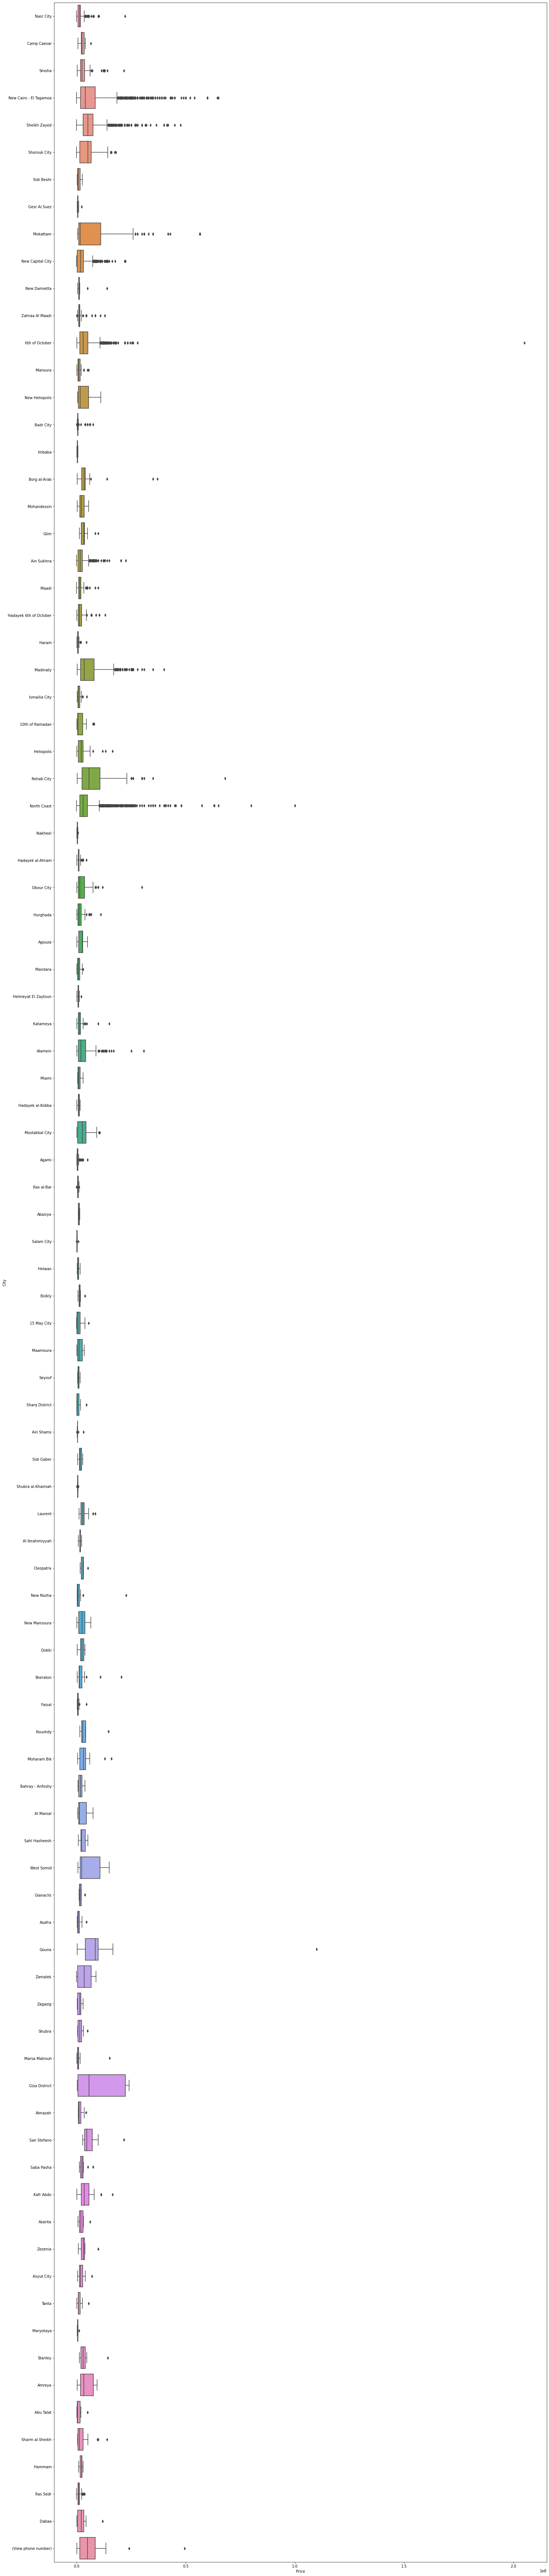

In [279]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df)

In [280]:
lcc = df['City'].value_counts().keys().tolist()

In [281]:
for x in lcc:
    Q1= df[(df['City']==x)]['Price'].quantile(0.25)
    Q3= df[(df['City']==x)]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df=df.drop(df[(df['City']==x)&(df['Price']>=upper_bound)].index)
    df=df.drop(df[(df['City']==x)&(df['Price']<=lower_bound)].index)

In [282]:
df['City'].unique()

array(['Camp Caesar', 'Smoha', 'Nasr City', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis', 'Badr City',
       'Imbaba', 'Borg al-Arab', 'Mohandessin', 'Glim', 'Ain Sukhna',
       'Maadi', 'Hadayek 6th of October', 'Haram', 'Madinaty',
       'Ismailia City', '10th of Ramadan', 'Heliopolis', 'Rehab City',
       'North Coast', 'Nakheel', 'Hadayek al-Ahram', 'Obour City',
       'Hurghada', 'Agouza', 'Mandara', 'Helmeyat El Zaytoun', 'Katameya',
       'Alamein', 'Miami', 'Hadayek al-Kobba', 'Mostakbal City', 'Agami',
       'Ras al-Bar', 'Abasiya', 'Salam City', 'Helwan', 'Bolkly',
       '15 May City', 'Maamoura', 'Seyouf', 'Sharq District', 'Ain Shams',
       'Sidi Gaber', 'Shubra al-Khaimah', 'Laurent', 'Al Ibrahimiyyah',
       'Cleopatra', 'New Nozha', 'New Mansoura', 'Dokki', 'Sheraton',
       'Faisal', 

In [283]:
df=df.drop(df[df['City']=='(View phone number)'].index)

In [284]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [285]:
df['Area'].describe()

count    18425.000000
mean       218.096065
std        142.474807
min         10.000000
25%        125.000000
50%        175.000000
75%        261.000000
max        990.000000
Name: Area, dtype: float64

In [287]:
#deleting some raws that doest make sensce like 4 rooms in 100 miters
df=df.drop(df[(df['Area']<=100)&(df['Bedrooms']>=4)].index)
df=df.drop(df[(df['Area']<=30)&(df['Type']!='Studio')].index)

In [289]:
df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')]
df=df.drop(df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')].index)

In [291]:
def Price_range(x) :
    if x <= 1000000 : 
        return 'Low Price'
    elif x <= 3000000 :
        return 'Mid Price'
    else :
        return 'high Price'

In [294]:
df['Price_range'] = df['Price'].apply(Price_range)

In [296]:
df.groupby('Price_range')['Payment_Option'].value_counts()

Price_range  Payment_Option     
Low Price    Cash or Installment    2314
             Cash                    988
             Installment             455
             Unknown Payment         174
Mid Price    Cash or Installment    2416
             Cash                   2187
             Installment            1177
             Unknown Payment         405
high Price   Cash                   3468
             Cash or Installment    2661
             Installment            1525
             Unknown Payment         612
Name: Payment_Option, dtype: int64

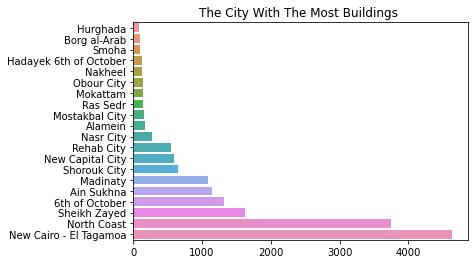

In [298]:
mp = df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);
plt.title('The City With The Most Buildings ');

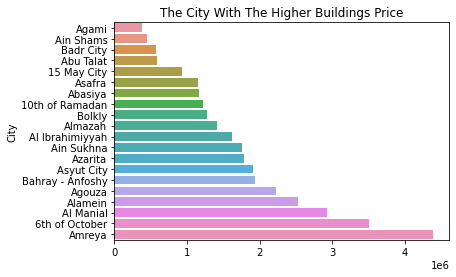

In [300]:
lpm = df.groupby('City')['Price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('The City With The Higher Buildings Price');

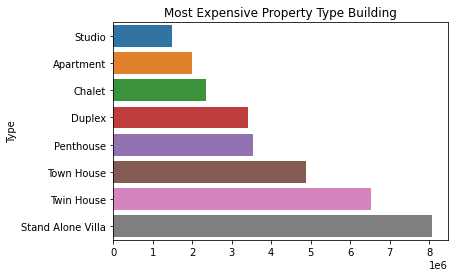

In [301]:
lpp = df.groupby('Type')['Price'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

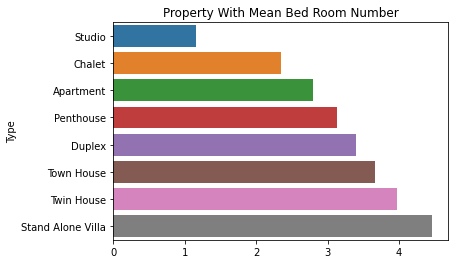

In [303]:
lpb = df.groupby('Type')['Bedrooms'].mean().sort_values()
sns.barplot(y=lpb.index,x=lpb.values);
plt.title('Property With Mean Bed Room Number');

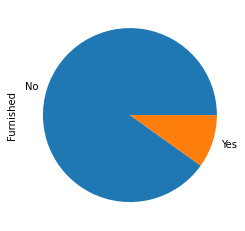

In [304]:
df['Furnished'].value_counts().plot(kind='pie');

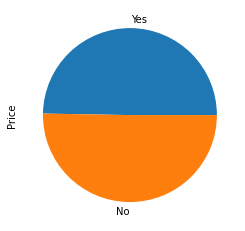

In [305]:
df.groupby('Furnished')['Price'].mean().sort_values().plot(kind='pie');

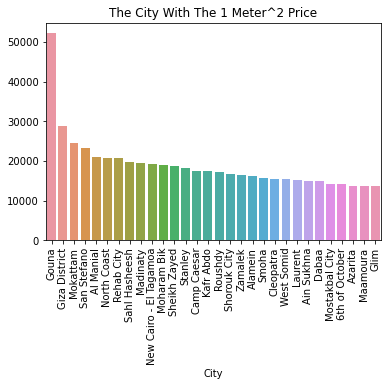

In [306]:
ind=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].index
vlu=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].values
sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The City With The 1 Meter^2 Price');

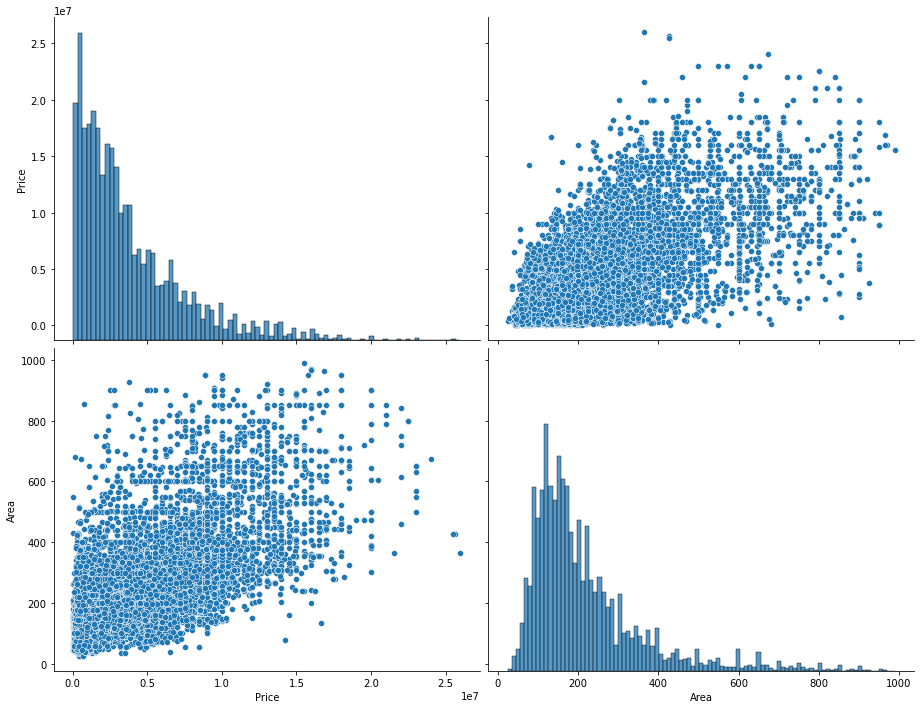

In [307]:
sns.pairplot(df, vars = ['Price', 'Area'], height=5, aspect=1.3)

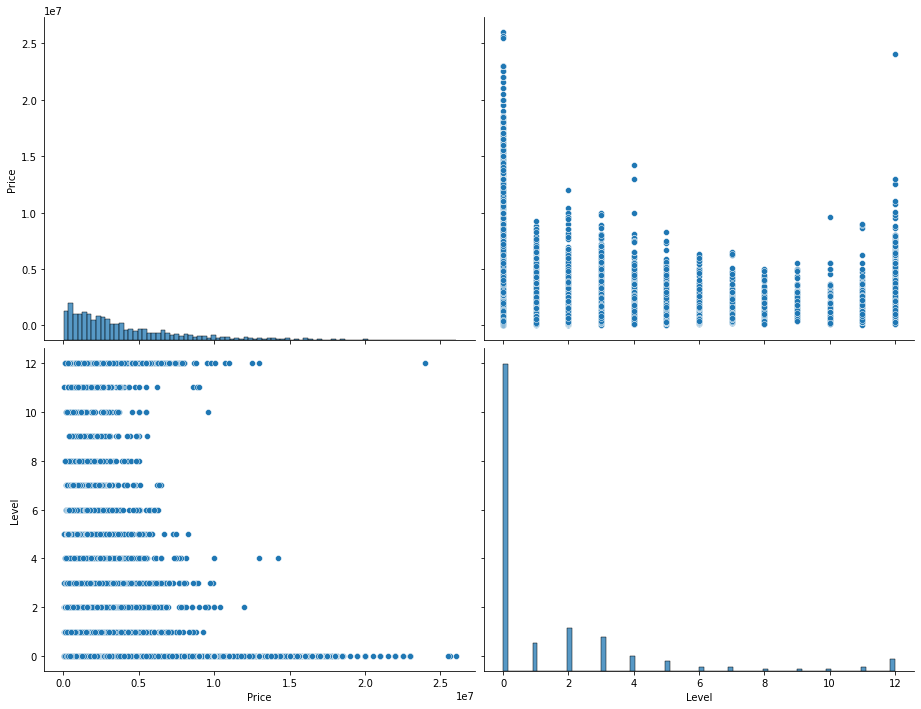

In [309]:
sns.pairplot(df, vars = ['Price', 'Level'], height=5, aspect=1.3);

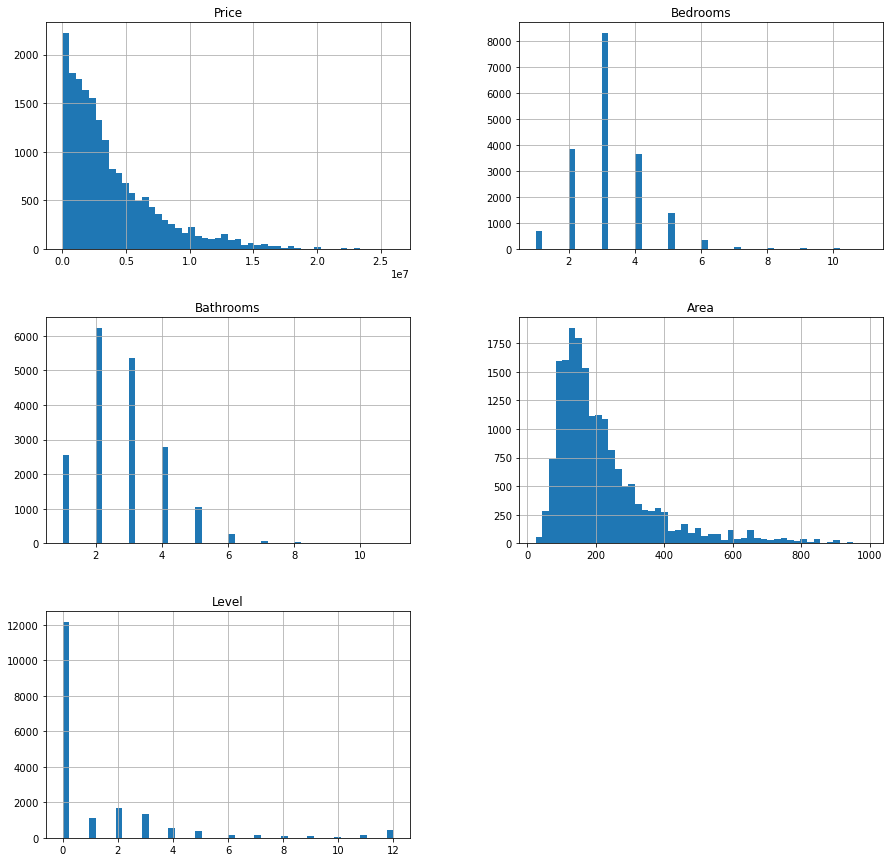

In [311]:
df.hist(bins=50, figsize=(15, 15));

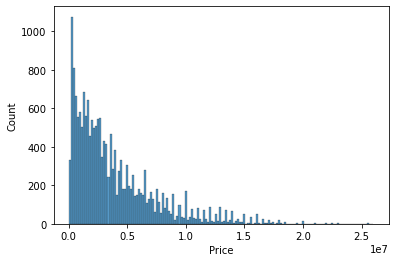

In [312]:
sns.histplot(data=df,x='Price',bins=150);

In [313]:
df = pd.get_dummies(df, columns = ['Type', 'Furnished','City' ,'Payment_Option','Delivery_Term'])
X = df.drop(columns = ['Price','Price_range'])
y = df[['Price']]

In [314]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13786, 116), (4596, 116), (13786, 1), (4596, 1))

In [315]:
def performance(model,X_train,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    model: Regression Model. The regression model.
    x_train: numpy.ndarray. The training data in the x.
    y_train: pandas.core.series.Series. The training data in the y.
    y_pred: numpy.ndarray. The predicted data.
    y_test: pandas.core.series.Series. The actual data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [316]:
#Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

#The predicted data
lr_pred = lr.predict(X_test)

In [317]:
performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.6022510769873577
Testing Score: 0.6056794425512455
Other Metrics In Testing Data: 
MSE: 4909759403539.345
MAE: 1579321.7848128807


In [318]:
#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#The predicted data
dt_pred = dt.predict(X_test)

#The performance
performance(dt,X_train,y_train,dt_pred,y_test)

Training Score: 0.9755374493391367
Testing Score: 0.4705977937288691
Other Metrics In Testing Data: 
MSE: 6591686411966.881
MAE: 1527231.0328620935


In [319]:
#Fitting the model
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())

#The predicted data
rf_pred = rf.predict(X_test)

#The performance
performance(rf,X_train,y_train,rf_pred,y_test)

Training Score: 0.9395149063426851
Testing Score: 0.6952799962479468
Other Metrics In Testing Data: 
MSE: 3794126062176.254
MAE: 1251255.433574137
